In [1]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.1 MB/s eta 0:00:00


In [2]:
!pip install dicom2nifti

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 879.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 24.1 MB/s eta 0:00:00


In [3]:
!pip install nilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 35.6 MB/s eta 0:00:00


In [4]:
import pydicom
import matplotlib.pyplot as plt
import dicom2nifti
import nilearn
from nilearn import plotting

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
class DicomFile():
  def __init__(self,ruta):
    self.ruta = ruta

  def cargarImagen(self):
    self.leer = pydicom.dcmread(self.ruta)
    print('¡Cargado con éxito!')
    return self.leer

  def mostrarInfoPac(self):
    self.nombre = self.leer[0x0010,0x0010].value
    self.estudio = self.leer[0x0008,0x1030].value
    print(f"El paciente de nombre: {self.nombre} tiene un estudio de: "f"{self.estudio}")

  def visualizarDicom(self):
    self.im = self.leer.pixel_array
    plt.imshow(self.im, cmap= 'twilight')
    plt.axis('off')
    plt.title('Corte axial de un CT CHEST W IV CONTRAST')
    plt.colorbar()
    plt.show()

class Conversion():
  def __init__(self,ruta,rutaNifti):
    self.ruta = ruta
    self.rutaNifti = rutaNifti

  def convertirNifti(self):
    self.dicom = self.ruta
    self.nifti = self.rutaNifti
    self.conversion = dicom2nifti.convert_directory(self.dicom,self.nifti)
    print('¡Felicidades! Se ha convertido con éxito')
    return self.conversion

class NiftiFile():
  def __init__(self,nuevaRuta):
    self.nuevaRuta = nuevaRuta

  def visualizarNifti(self):
    self.read = nilearn.image.load_img(self.nuevaRuta)
    self.imagen = plotting.plot_anat(self.read, display_mode = 'ortho', title = 'Planos Axial, Sagital y Coronal', colorbar = True, cmap = 'inferno')

  def mostrarInfoImg(self):
    self.info = self.read.shape
    print(f"La imagen tiene tres dimensiones:\n"
    f"{self.info[0]} píxeles en la dimensión de ancho.\n"
    f"{self.info[1]} píxeles en la dimensión de alto.\n"
    f"{self.info[2]} cortes.")

In [104]:
ruta = DicomFile(r'/content/drive/MyDrive/imgDicom/000003.dcm')
leer = ruta.cargarImagen()

¡Cargado con éxito!


In [105]:
info = ruta.mostrarInfoPac()
info

El paciente de nombre: C3N-00247 tiene un estudio de: CT CHEST W IV CONTRAST


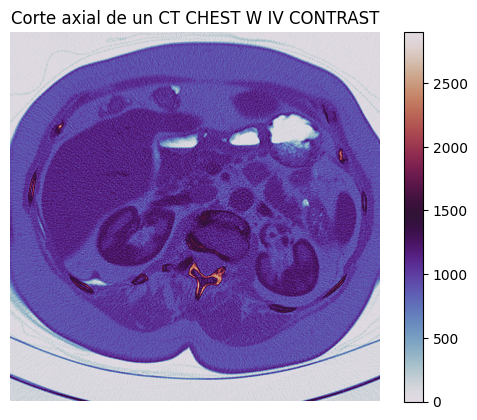

In [8]:
ver = ruta.visualizarDicom()

In [9]:
convertir = Conversion(r'/content/drive/MyDrive/imgDicom',r'/content/drive/MyDrive/imgNifti')
convertir.convertirNifti()

¡Felicidades! Se ha convertido con éxito


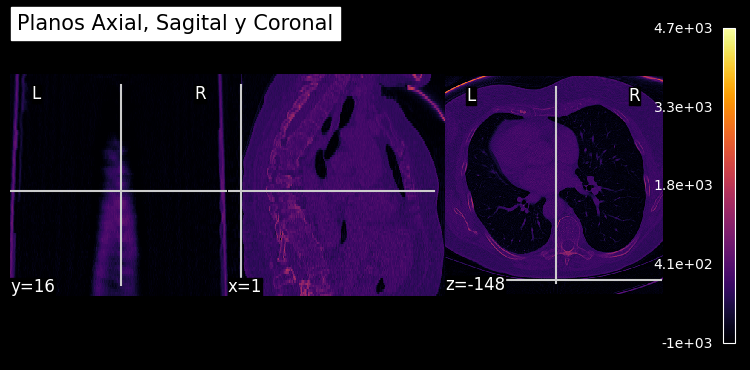

In [74]:
imagen = NiftiFile(r"/content/drive/MyDrive/imgNifti/2_lung_30__b70f.nii.gz")
imagen.visualizarNifti()

In [75]:
imagen.mostrarInfoImg()

La imagen tiene tres dimensiones:
512 píxeles en la dimensión de ancho.
512 píxeles en la dimensión de alto.
99 cortes.
